## Importing Necessary Libraries

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

## Importing the Dataset

In [10]:
main_dir=r"C:\Users\User\Desktop\MaskDetector\Dataset"

train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [11]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']


In [12]:
train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [13]:
import matplotlib.image as mpimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))
mask_pic=[]
for i in train_mask_names[0:8]:
    mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic=[]
for i in train_nomask_names[0:8]:
    nomask_pic.append(os.path.join(train_nomask_dir,i))
print(mask_pic)
print(nomask_pic)

['C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0003.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0006.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0018.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0019.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0022.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0027.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0029.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Mask\\0037.jpg']
['C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Non Mask\\0.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Non Mask\\1.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Non Mask\\10.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Non Mask\\100.jpg', 'C:\\Users\\User\\Desktop\\MaskDetector\\Dataset\\Train\\Non Mask\\101.jpg', 'C:\\Users\\User\\Desktop\

<Figure size 864x864 with 0 Axes>

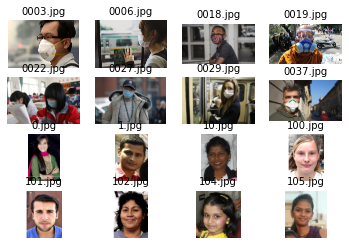

In [14]:
merged_list=mask_pic+nomask_pic
for i in range(0,len(merged_list)):
    data=merged_list[i].split('\\',8)[8]
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    image=mpimg.imread(merged_list[i])
    sp.set_title(data,fontsize = 10)
    plt.imshow(image,cmap='gray')
plt.show()

## Image Augmentation

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=40,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [17]:
train_generator.image_shape

(150, 150, 3)

## Building the Convolutional Neural Network

### Adding the 1st convolutional layer

In [18]:
model=Sequential()
# Adding 1st convolutional layer with 32 feature detectors
model.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[150,150,3]))
# Performing Max Pooling on the convolved images
model.add(MaxPooling2D(pool_size=(2,2)))
# Performing droping avoid overfitting
model.add(Dropout(0.5))

### Adding the 2nd convolutional layer

In [19]:
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

### Flattening

In [20]:
model.add(Flatten())

### Adding the Dense layers

In [21]:
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0

### Compiling the Convolutional Neural Network

In [22]:
model.compile(Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])

### Training the Model on the training set and performing validation on the validation set

In [23]:
history=model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
19/19 [==============================] - 27s 1s/step - loss: 4.1245 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 26s 1s/step - loss: 0.6636 - accuracy: 0.6089 - val_loss: 0.6412 - val_accuracy: 0.8627
Epoch 3/30
19/19 [==============================] - 33s 2s/step - loss: 0.5004 - accuracy: 0.7541 - val_loss: 0.5009 - val_accuracy: 0.8268
Epoch 4/30
19/19 [==============================] - 26s 1s/step - loss: 0.4110 - accuracy: 0.8372 - val_loss: 0.5137 - val_accuracy: 0.8105
Epoch 5/30
19/19 [==============================] - 24s 1s/step - loss: 0.3622 - accuracy: 0.8509 - val_loss: 0.4497 - val_accuracy: 0.8431
Epoch 6/30
19/19 [==============================] - 25s 1s/step - loss: 0.3279 - accuracy: 0.8696 - val_loss: 0.3597 - val_accuracy: 0.9052
Epoch 7/30
19/19 [==============================] - 28s 2s/step - loss: 0.2840 - accuracy: 0.9241 - val_loss: 0.4414 - val_accuracy: 0.8170
Epoch 8/30
19/19 [==

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting graphs to analyze the model

#### Training Loss vs Validation Loss

Text(0.5, 0, 'epoch')

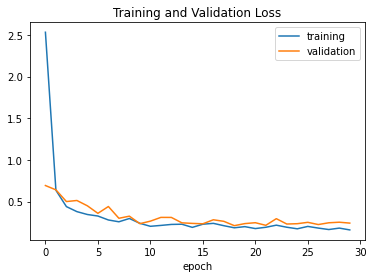

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

#### Training Accuracy vs Validation Accuracy

Text(0.5, 0, 'epoch')

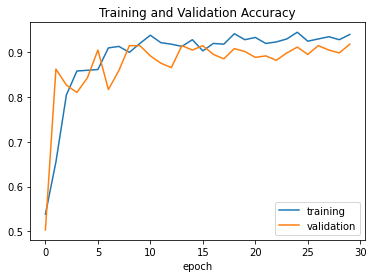

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [27]:
# In above graph the 2 curves have very small differences b/w them so no overfitting occured.

### Predictions on the test set

In [28]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss:{},test_acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 2s 412ms/step - loss: 0.2057 - accuracy: 0.8900
test_loss:0.2056760936975479,test_acc:0.8899999856948853


### Predictions on Single Images

In [29]:
from keras.preprocessing import image
test_image=image.load_img(r'C:\Users\User\Desktop\MaskDetector\Dataset\Single_Prediction\person3.jpg',target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image/255.0)
print("Probability of no mask:",result)
if result[0][0] > 0.5:
    print('No mask')
else :
    print('Mask')

Probability of no mask: [[0.9082369]]
No mask


### Saving the model

In [30]:
model.save('model.h5')